In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
job_titels = ["Data Analyst","Data Engineer","Data Scientist"]
df_us = df[(df['job_title_short'].isin(job_titels)) & (df['job_country'] == 'United States')].copy()
df_us["job_title_short"].value_counts()


# df_DA["salary_year_avg"].plot(kind="box", vert=False)


job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [4]:
df_us = df_us.dropna(subset="salary_year_avg")

In [5]:
job_list = [df_us[df_us["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titels]

In [6]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

C:\Users\ma3\AppData\Local\Temp\ipykernel_16968\2310310921.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titels, vert=False)


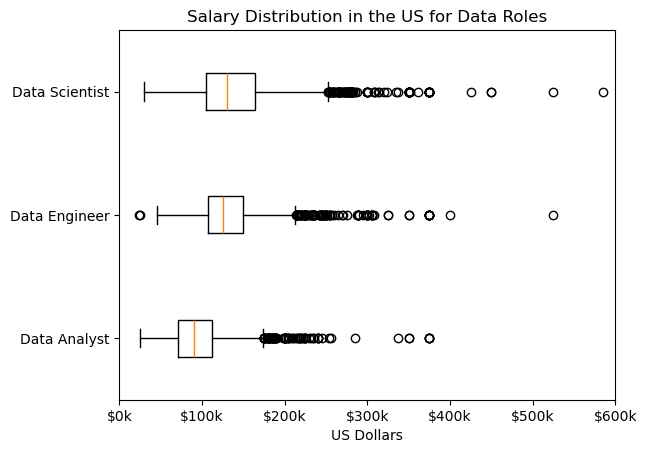

In [7]:
plt.boxplot(job_list, labels=job_titels, vert=False)
plt.title("Salary Distribution in the US for Data Roles")
plt.xlabel("US Dollars")
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
plt.show()

In [8]:
import seaborn as sns

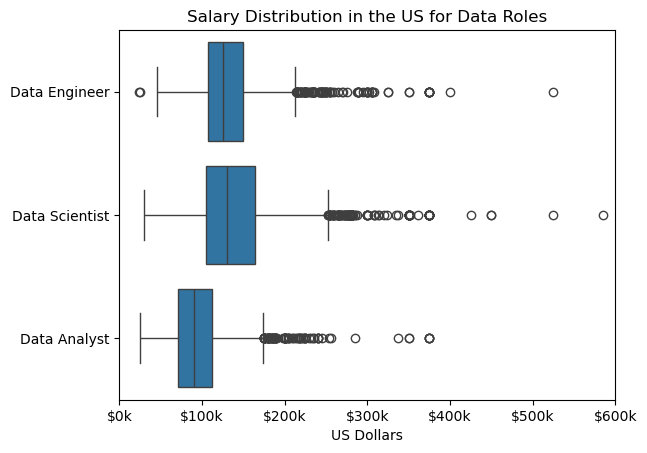

In [11]:
sns.boxplot(data=df_us, y="job_title_short", x="salary_year_avg")

plt.title("Salary Distribution in the US for Data Roles")
plt.xlabel("US Dollars")
plt.ylabel("")
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
plt.show()